**Giới thiệu:**

Đây là một một bộ dữ liều được lấy từ tiki dùng API tiki hỗ trợ để cào dữ liệu về cụ thể ở đây là các sản phẩm điện tử nói chung từ 3 danh mục chính là điện thoại máy tính bảng, laptop may vi tính linh kiện, thiệt bị ktx phụ kiện số.

Ưu điểm của việc lấy dữ liệu này là dễ dàng, nhanh chóng, không cần đăng nhập, hạn chế việc bị chặn từ trang web khi dùng các phương pháp khác.
Điểm yếu của việc lấy dữ liệu API key là chưa thể lấy đúng danh mục sản phẩm cụ thể hơn

**Mô tả dữ liệu:**

Bộ dữ liệu là toàn bộ sản phẩm của 3 danh mục kể trên để có thể bao quát nhất về bộ dữ liệu các sản phẩm điện tử, gồm 5000 dòng dữ liệu


*   **id**: Mã sản phẩm
*   **name**: Tên sản phẩm
*   **brand**: Tên thương hiệu của sản phẩm
*   **original_price**: Giá gốc của sản phẩm
*   **price**: Giá hiện tại của sản phẩm
*   **discount**: Giảm giá
*   **quantity_sold**: Số lượng sản phẩm đã bán
*   **rating_average**: Trung bình đánh giá sản phẩm
*   **review_count**: Số lượt bình luận
*   **category**: danh mục của sản phẩm









In [ ]:
import requests
import imageio
import matplotlib
import matplotlib.pyplot as plt
import numpy             as np
import pandas            as pd
import pydotplus         as pdp
import scipy.stats       as st
import seaborn           as sbn
import seaborn           as sns
import warnings
warnings.filterwarnings('ignore')

# Crawl data from Tiki

In [ ]:
all_query = ['https://tiki.vn/api/personalish/v1/blocks/listings?limit=40&include=advertisement&aggregations=2&trackity_id=fefc5842-4e9e-3516-6753-d6f4acf320ea&category=1789&page={page}&urlKey=dien-thoai-may-tinh-bang',
             'https://tiki.vn/api/personalish/v1/blocks/listings?limit=40&include=advertisement&aggregations=2&trackity_id=fefc5842-4e9e-3516-6753-d6f4acf320ea&category=1846&page={page}&urlKey=laptop-may-vi-tinh-linh-kien',
             'https://tiki.vn/api/personalish/v1/blocks/listings?limit=40&include=advertisement&aggregations=2&trackity_id=fefc5842-4e9e-3516-6753-d6f4acf320ea&category=1815&page={page}&urlKey=thiet-bi-kts-phu-kien-so']

headers = {'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/112.0.0.0 Safari/537.36 Edg/112.0.0.0'}

id = []
name = []
price = []
quantity_sold = []
rating_average = []
review_count = []
brand_name = []
original_price= []
discount = []
category = []

In [ ]:
for query in all_query:
  page = 1
  while True:
    r = requests.get(query.replace('{page}',str(page)),headers = headers)
    print('Get data - page:',page)

    if r.status_code != 200:
      print('Hết page')
      break

    if (len(r.json()['data']) == 0):
      print('Hết page')
      break

    else:
      data = r.json()['data']
      for item in data:
        id.append(item['id'])
        name.append(item['name'])
        brand_name.append(item['brand_name'])
        try:
          quantity_sold.append(item['quantity_sold']['value'])
        except:
          quantity_sold.append('0')

        original_price.append(item['original_price'])
        price.append(item['price'])
        discount.append(item['discount_rate'])
        rating_average.append(item['rating_average'])
        review_count.append(item['review_count'])

        start_index = query.find('urlKey=') + len('urlKey=')
        end_index = query.find('&', start_index)
        keyword = query[start_index:end_index]
        keyword = keyword.replace('-', ' ')
        category.append(keyword)

      print(f'Page {page} --  Done')
      page +=1
      # if page == 200: break


Get data - page: 1
Page 1 --  Done
Get data - page: 2
Page 2 --  Done
Get data - page: 3
Page 3 --  Done
Get data - page: 4
Page 4 --  Done
Get data - page: 5
Page 5 --  Done
Get data - page: 6
Page 6 --  Done
Get data - page: 7
Page 7 --  Done
Get data - page: 8
Page 8 --  Done
Get data - page: 9
Page 9 --  Done
Get data - page: 10
Page 10 --  Done
Get data - page: 11
Page 11 --  Done
Get data - page: 12
Page 12 --  Done
Get data - page: 13
Page 13 --  Done
Get data - page: 14
Page 14 --  Done
Get data - page: 15
Page 15 --  Done
Get data - page: 16
Page 16 --  Done
Get data - page: 17
Page 17 --  Done
Get data - page: 18
Page 18 --  Done
Get data - page: 19
Page 19 --  Done
Get data - page: 20
Page 20 --  Done
Get data - page: 21
Page 21 --  Done
Get data - page: 22
Page 22 --  Done
Get data - page: 23
Page 23 --  Done
Get data - page: 24
Page 24 --  Done
Get data - page: 25
Page 25 --  Done
Get data - page: 26
Page 26 --  Done
Get data - page: 27
Page 27 --  Done
Get data - page: 28

In [ ]:
df = pd.DataFrame({'id': id,
                   'name':name,
                   'brand_name':brand_name,
                   'original_price': original_price,
                   'price':price,
                   'discount': discount,
                   'quantity_sold':quantity_sold,
                   'rating_average':rating_average,
                   'review_count':review_count,
                   'category': category
                   }, columns = ['id','name','brand_name','original_price','price','discount','quantity_sold','rating_average','review_count','category'])

In [ ]:
df

id                                               name brand_name  \
0     216174917  Điện thoại Samsung Galaxy S23 Ultra 5G (8GB/25...    Samsung   
1     212040697  Điện Thoại Samsung Galaxy A04 (3GB/32GB) - Hàn...    Samsung   
2     198671718  Điện Thoại Samsung Galaxy A04s (4GB/64GB) - Hà...    Samsung   
3     250109584  Điện thoại Xiaomi Redmi Note 12 (4GB/128GB) - ...     Xiaomi   
4     221274391  Điện thoại Tecno SPARK GO 2023 4GB/64GB - Heli...      Tecno   
...         ...                                                ...        ...   
5096  127986319  K2 LCD display cleaner - dung dịch lau rửa sạc...         K2   
5097    8275109  Đế kẹp điện thoại 2 chiều gắn chân máy Tripod 1/4        OEM   
5098   59482840  Bộ Hub QGeeM đa năng 5 trong 1 dành cho MacBoo...      QGeeM   
5099   35723054  Giá Đỡ ,kẹp điện thoại /ipad (có thể kẹp mic l...        OEM   
5100   91189740  Dây dán tiên lợi Velcro làm gọn dây sạc, dây t...     UGREEN   

      original_price     price  discount quantity_sold  rating_average  \
0           31990000  31990000         0            17             5.0   
1            2990000   1950000        35             9             3.0   
2            3990000   2810000        30            45             5.0   
3            4990000   3950000        21            66             5.0   
4            2490000   2290000         8            27             4.7   
...              ...       ...       ...           ...             ...   
5096          149000    149000         0           195             5.0   
5097           10859     10859         0           172             4.5   
5098          399000    280000        30            13             5.0   
5099           89000     74000        17            16             3.0   
5100           21000     15000        29           318             4.8   

      review_count                 category  
0                3  dien thoai may tinh ban  
1                1  dien thoai may tinh ban  
2               12  dien thoai may tinh ban  
3               19  dien thoai may tinh ban  
4                6  dien thoai may tinh ban  
...            ...                      ...  
5096            28  thiet bi kts phu kien s  
5097            33  thiet bi kts phu kien s  
5098             2  thiet bi kts phu kien s  
5099             3  thiet bi kts phu kien s  
5100            71  thiet bi kts phu kien s  

[5101 rows x 10 columns]

In [ ]:
df.tail()

id                                               name brand_name  \
5096  127986319  K2 LCD display cleaner - dung dịch lau rửa sạc...         K2   
5097    8275109  Đế kẹp điện thoại 2 chiều gắn chân máy Tripod 1/4        OEM   
5098   59482840  Bộ Hub QGeeM đa năng 5 trong 1 dành cho MacBoo...      QGeeM   
5099   35723054  Giá Đỡ ,kẹp điện thoại /ipad (có thể kẹp mic l...        OEM   
5100   91189740  Dây dán tiên lợi Velcro làm gọn dây sạc, dây t...     UGREEN   

      original_price   price  discount quantity_sold  rating_average  \
5096          149000  149000         0           195             5.0   
5097           10859   10859         0           172             4.5   
5098          399000  280000        30            13             5.0   
5099           89000   74000        17            16             3.0   
5100           21000   15000        29           318             4.8   

      review_count                 category  
5096            28  thiet bi kts phu kien s  
5097            33  thiet bi kts phu kien s  
5098             2  thiet bi kts phu kien s  
5099             3  thiet bi kts phu kien s  
5100            71  thiet bi kts phu kien s

In [ ]:
df.shape

(5101, 10)

In [ ]:
df.columns

Index(['id', 'name', 'brand_name', 'original_price', 'price', 'discount',
       'quantity_sold', 'rating_average', 'review_count', 'category'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5101 entries, 0 to 5100
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              5101 non-null   int64  
 1   name            5101 non-null   object 
 2   brand_name      5101 non-null   object 
 3   original_price  5101 non-null   int64  
 4   price           5101 non-null   int64  
 5   discount        5101 non-null   int64  
 6   quantity_sold   5101 non-null   object 
 7   rating_average  5101 non-null   float64
 8   review_count    5101 non-null   int64  
 9   category        5101 non-null   object 
dtypes: float64(1), int64(5), object(4)
memory usage: 398.6+ KB


In [ ]:
df['quantity_sold'] = df['quantity_sold'].astype(int)

In [ ]:
df.nunique()

id                5083
name              4995
brand_name         522
original_price    1573
price             1924
discount            72
quantity_sold      768
rating_average      30
review_count       365
category             3
dtype: int64

#Data Preparation

## Missing values

In [ ]:
df.isnull().sum()

id                0
name              0
brand_name        0
original_price    0
price             0
discount          0
quantity_sold     0
rating_average    0
review_count      0
category          0
dtype: int64

In [ ]:
df.isnull().count()

id                5101
name              5101
brand_name        5101
original_price    5101
price             5101
discount          5101
quantity_sold     5101
rating_average    5101
review_count      5101
category          5101
dtype: int64

## Duplicate values

In [ ]:
df.duplicated().value_counts()

False    5094
True        7
dtype: int64

In [ ]:
df.loc[df.duplicated()].head(10)

id                                               name brand_name  \
57    252427658  Điện thoại Tecno SPARK 10 Pro 8GB/128GB - Heli...      Tecno   
101   221274391  Điện thoại Tecno SPARK GO 2023 4GB/64GB - Heli...      Tecno   
180    72310420  Máy tính bảng VANKYO MatrixPad S30 - Hàng Chín...     Vankyo   
295   252423003  Điện thoại Tecno SPARK 10 4GB/128GB - Camera 5...      Tecno   
3114  102600970  Củ sạc nhanh chuẩn kép PD và QC3.0 Remax RP-U8...      Remax   
4128  198592687  Gimbal Điện Thoại Giá Đỡ CYKE P01 quay video 3...      CYKE    
4661  195998782  Cáp sạc và truyền dữ liệu 2.4A Remax RC-138a U...      Remax   

      original_price    price  discount  quantity_sold  rating_average  \
57           3990000  3540000        11             31             4.6   
101          2490000  2290000         8             27             4.7   
180          3090000  3090000         0             11             3.8   
295          3190000  2890000         9              4             0.0   
3114          300000   229000        24           2772             4.8   
4128          689000   292000        58             20             3.8   
4661           99000    55000        44            747             5.0   

      review_count                 category  
57               8  dien thoai may tinh ban  
101              6  dien thoai may tinh ban  
180              4  dien thoai may tinh ban  
295              0  dien thoai may tinh ban  
3114           695  thiet bi kts phu kien s  
4128             4  thiet bi kts phu kien s  
4661            13  thiet bi kts phu kien s

**Ở đây tôi không xóa đi những hàng bị trùng là vì khi ta hiển thị nó lên và kiểm tra lại thì đây là những sản phẩm hoàn toàn khác nhau nên việc giữ lại là cần thiết**

In [ ]:
# df = df.drop_duplicates()
# df.info()

## Phân tích biến khác của bộ dữ liệu

In [ ]:
df.describe()

id  original_price         price     discount  quantity_sold  \
count  5.101000e+03    5.101000e+03  5.101000e+03  5101.000000    5101.000000   
mean   1.277155e+08    2.337042e+06  2.008766e+06    11.192707     208.095864   
std    7.844284e+07    5.241396e+06  4.445817e+06    16.045362    1043.922579   
min    5.464500e+04    1.900000e+03  1.000000e+03     0.000000       0.000000   
25%    5.618583e+07    1.450000e+05  1.250000e+05     0.000000       2.000000   
50%    1.366765e+08    4.500000e+05  3.630000e+05     0.000000      22.000000   
75%    1.963731e+08    2.230000e+06  1.966000e+06    19.000000     107.000000   
max    2.635680e+08    6.599000e+07  6.599000e+07    89.000000   40614.000000   

       rating_average  review_count  
count     5101.000000   5101.000000  
mean         3.636973     41.623603  
std          1.953204    173.386531  
min          0.000000      0.000000  
25%          3.700000      1.000000  
50%          4.600000      5.000000  
75%          5.000000     22.000000  
max          5.000000   5258.000000

In [ ]:
df.brand_name.value_counts().head(20)

OEM          1388
Samsung       475
Xiaomi        143
OPPO          128
Logitech      102
TP-Link        99
UGREEN         81
Masstel        67
Baseus         62
Panasonic      62
Dell           56
SanDisk        55
PKCB           51
HI PC          47
Remax          46
WD             45
Nokia          42
Hoco           39
Kindle         34
Asus           32
Name: brand_name, dtype: int64

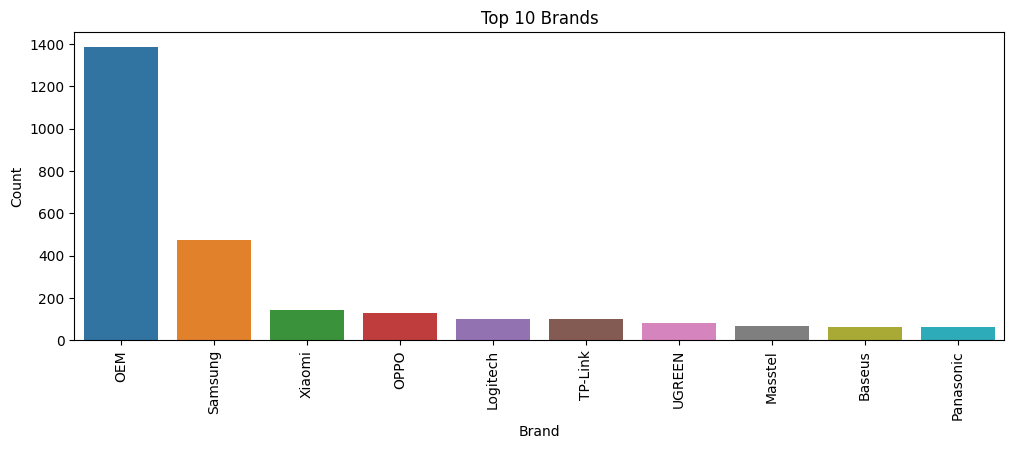

In [ ]:
plt.figure(figsize=(12, 4))
ax = sns.barplot(x=df.brand_name.value_counts().head(10).index, y=df.brand_name.value_counts().head(10).values)
plt.xticks(rotation=90)
plt.xlabel('Brand')
plt.ylabel('Count')
plt.title('Top 10 Brands')
plt.show()

**Đây là những brand trong ngành hàng thiết bị điện tử nói chung. Vì chúng ta có những sản phẩm như phụ kiện nên OEM(Original Equipment Manufacturer, tức là Nhà sản xuất Thiết bị Gốc) chiếm phần lớn, sau đó là Samsung chiếm một số lượng nhất định**

In [ ]:
df['rating_average'].value_counts()

5.0    1512
0.0    1087
4.8     552
4.5     447
4.7     444
4.6     328
4.0     175
4.3     131
4.2      82
3.0      59
4.1      48
3.8      41
3.7      39
3.9      31
1.0      26
3.5      23
3.3      17
3.6      13
2.0      12
3.4      10
3.2       4
2.8       4
3.1       4
2.5       3
2.3       3
2.7       2
1.5       1
2.9       1
2.6       1
2.4       1
Name: rating_average, dtype: int64

# Overview

**Ở đây, tôi dùng một thư viện của python là pandas profiling để tể có thể nhìn lại bộ dữ liệu một lần nữa đễ có cái nhìn tổng quát về bộ dữ liệu từ đó đưa ra những phân tích**

In [ ]:
pip install pandas_profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas_profiling
profile_report = df.profile_report(title='Pandas Profiling Report')
profile_report.to_notebook_iframe()


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Exploratory Data Analysis (EDA)

## All Category

In [ ]:
# Kiểm tra các dòng có lượt review lớn hơn lượt bán
df_review_greater_than_sales = df[df['review_count'] > df['quantity_sold']]

# In ra các dòng có lượt review lớn hơn lượt bán
df_review_greater_than_sales


id                                               name brand_name  \
1701  49729824  Màn Hình Samsung LU28R550UQEXXV 28'' UHD 4K (3...    Samsung   
3031  58203531  Màn Hình Cong LG 35WN75C-B 35 Inch QHD (3440 x...         LG   
3779  14706909                  Pin Điện Thoại BL-5C 1020mAh-3.7V        OEM   
4185  54977688  Dây cáp sata 3 dành cho ổ cứng HDD, SSD  được ...        OEM   

      original_price     price  discount  quantity_sold  rating_average  \
1701         6420000   6420000         0              2             5.0   
3031        12780000  12780000         0              2             3.3   
3779           29000     29000         0             15             4.6   
4185           15000     13500        10              0             4.3   

      review_count                     category  
1701            19  laptop may vi tinh linh kie  
3031             3  laptop may vi tinh linh kie  
3779           173      thiet bi kts phu kien s  
4185             3      thiet bi kts phu kien s

In [ ]:
df = df.drop(df_review_greater_than_sales.index)

**Ở đây, tôi có kiểm tra các sản phẩm có lượt review cao hơn lượt bán, vì không thể nào khi chưa bán được bất kỳ sản phẩm nào mà lại cho lượt review cho thấy rằng các sản phẩm này có vấn đề nên tôi đã xóa chúng**

In [ ]:
df.head()

id                                               name brand_name  \
0  216174917  Điện thoại Samsung Galaxy S23 Ultra 5G (8GB/25...    Samsung   
1  212040697  Điện Thoại Samsung Galaxy A04 (3GB/32GB) - Hàn...    Samsung   
2  198671718  Điện Thoại Samsung Galaxy A04s (4GB/64GB) - Hà...    Samsung   
3  250109584  Điện thoại Xiaomi Redmi Note 12 (4GB/128GB) - ...     Xiaomi   
4  221274391  Điện thoại Tecno SPARK GO 2023 4GB/64GB - Heli...      Tecno   

   original_price     price  discount  quantity_sold  rating_average  \
0        31990000  31990000         0             17             5.0   
1         2990000   1950000        35              9             3.0   
2         3990000   2810000        30             45             5.0   
3         4990000   3950000        21             66             5.0   
4         2490000   2290000         8             27             4.7   

   review_count                 category  
0             3  dien thoai may tinh ban  
1             1  dien thoai may tinh ban  
2            12  dien thoai may tinh ban  
3            19  dien thoai may tinh ban  
4             6  dien thoai may tinh ban

In [ ]:
top_10_product = df.sort_values(by='quantity_sold', ascending = False).head(10)
top_10_product

id                                               name brand_name  \
3119    1600005                  Tai Nghe Nhét Tai Mi Basic Xiaomi     Xiaomi   
3511    4897521                       Tai Nghe Nhét Tai JBL C150SI        JBL   
27    142545270  Điện Thoại Oppo A16k (3GB/32GB) Xanh thời thượ...       OPPO   
3259     855018        Tai Nghe Nhét Tai Sony ExtraBass MDR-XB55AP       Sony   
3327     299431                      Chuột Không Dây Logitech M221   Logitech   
3124   54017350  Adapter Sạc 1 Cổng Anker PowerPort III Nano Tí...      ANKER   
26    189658085                     Điện Thoại Oppo A57 (4GB/64GB)       OPPO   
3388     895314         Tai Nghe Nhét Tai Langsdom Super Bass JM26   Langston   
3228     125781           Tai Nghe Nhét Tai Sony Fontopia MDR-E9LP       Sony   
1117  134561311  USB 3.0 SanDisk Ultra Flair CZ73 - Hàng Nhập Khẩu    SanDisk   

      original_price    price  discount  quantity_sold  rating_average  \
3119          149000   120000        19          40614             4.7   
3511          250000   250000         0          26732             4.7   
27           3190000  2600000         0          23270             5.0   
3259          790000   650000        18          12616             4.7   
3327          272800   169000        38          12525             4.7   
3124          400000   288000        28          12266             5.0   
26           4490000  3860000        14          11009             5.0   
3388           45000    45000         0          10521             4.2   
3228          199000   116000        42          10198             4.5   
1117          110000   110000         0           9991             4.8   

      review_count                     category  
3119          4197      thiet bi kts phu kien s  
3511          5258      thiet bi kts phu kien s  
27             275      dien thoai may tinh ban  
3259          2500      thiet bi kts phu kien s  
3327          1575      thiet bi kts phu kien s  
3124          3784      thiet bi kts phu kien s  
26             144      dien thoai may tinh ban  
3388           432      thiet bi kts phu kien s  
3228          1381      thiet bi kts phu kien s  
1117           208  laptop may vi tinh linh kie

**Những sản phẩm có số lượng bán tốt nhất. Đầu tiên là Tai nghe nhét tai Mi Basic Xiaom và sau đó là Tai nghe nhét tai JBL C150SI. Nhìn tổng quan thì những sản phẩm này đến từ danh mục thiết bị kỹ thuật số phụ kiện số vì trong danh mục này những sản phẩm có có giá khá rẽ cũng như nhu cầu về những phụ kiện này là cần thiết còn về 2 danh mục kìa vì giá sản phẩm thường khá cao người tiêu dùng chưa đủ tự tin đễ mua hàng trực tuyến.**

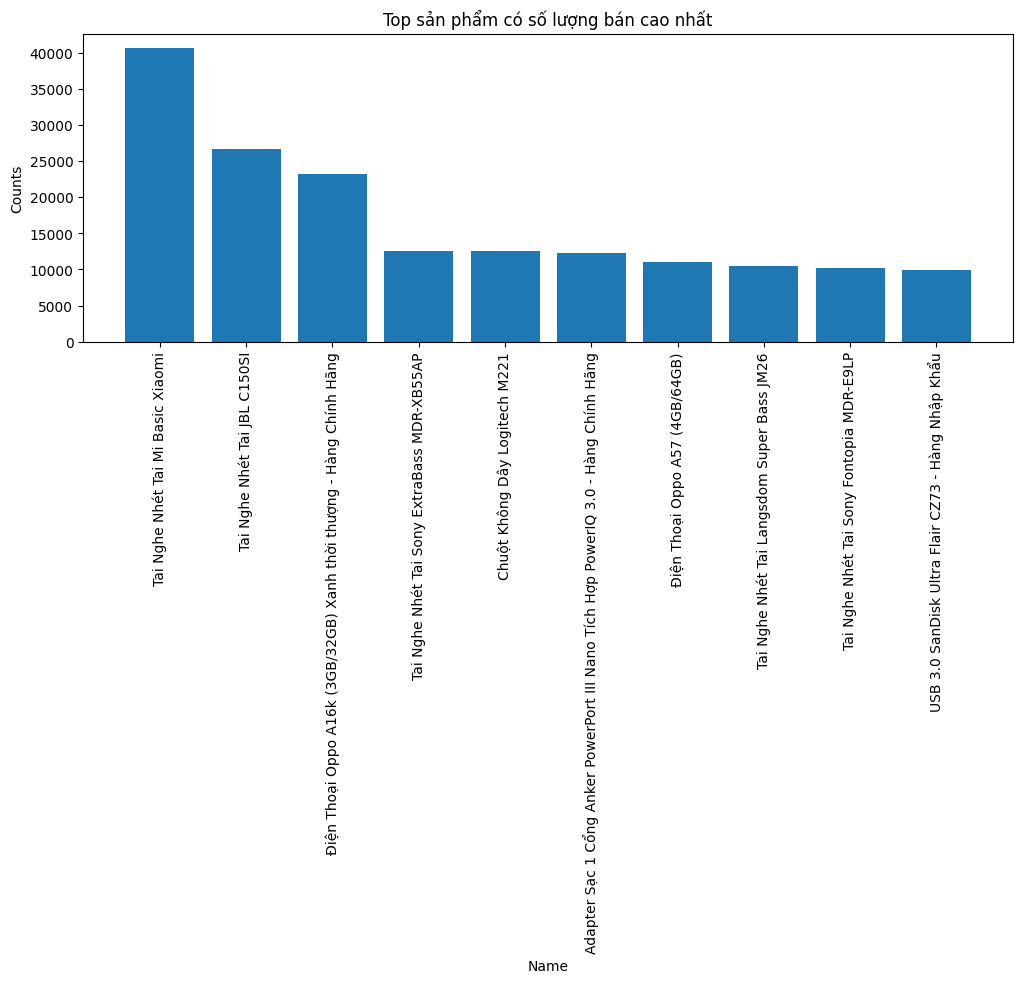

In [ ]:
ax = plt.subplots(figsize=(12, 4))[1]
ax.bar(x=top_10_product['name'], height=top_10_product['quantity_sold'])
plt.xticks(rotation=90)
ax.set_title('Top sản phẩm có số lượng bán cao nhất')
ax.set_xlabel('Name')
ax.set_ylabel('Counts')

plt.show()

In [ ]:
top_brand = df.groupby('brand_name')['quantity_sold'].sum().sort_values(ascending = False).head(10).reset_index()
top_brand

brand_name  quantity_sold
0        OEM         150946
1   Logitech          80018
2     Xiaomi          58458
3      Apple          52637
4       OPPO          46462
5      ANKER          42740
6       Sony          41714
7    SanDisk          35805
8        JBL          30581
9    Samsung          27864

**Các brand có số lượng sản phẩm được bán nhiều nhất vì những sản phẩm phụ kiện có lượt bán khá nhiều nền vị trí đầu tiên là của OEM nhưng thất bất ngờ là số lượng bán của Logitech xếp vị trí thứ 2 trong khi số lượng sản phẩm của thương hiệu này không bằng một nữa của Samsung như được phân tích ở trên. Vấn đề ở đây của Samsung là có quá nhiều sản phẩm, tuy nói việc có quá nhiều sản phẩm ở nhiều phân khúc có thể tiếp cần được đến nhiều người nhưng khi đặt lên bàn cân so sánh thì những sản phẩm của Samsung trong nhiều mức giá chứa thể so sánh với những thương hiệu khác. Ví dụ dư những sản phẩm giá rẻ của Samsung thì cấu hình quá yếu không thể nào so lại với Xiaomi hay Oppo trong khi cùng một tầm giá nhưng những thương hiệu này cung cấp cho người dùng như vi xử lý tốt hơn, còn về những sản phẩm đắt tiền thì Apple vẫn sẽ là sự lựa chọn an toàn hơn đối với người tiêu dùng. Nên thiết nghĩ Samsung nên chọn ra những sản phẩm cốt lõi trong từng phân khúc giá để có thể so sánh với những thương hiệu khác để có thể tăng số doanh thu cho mình.**

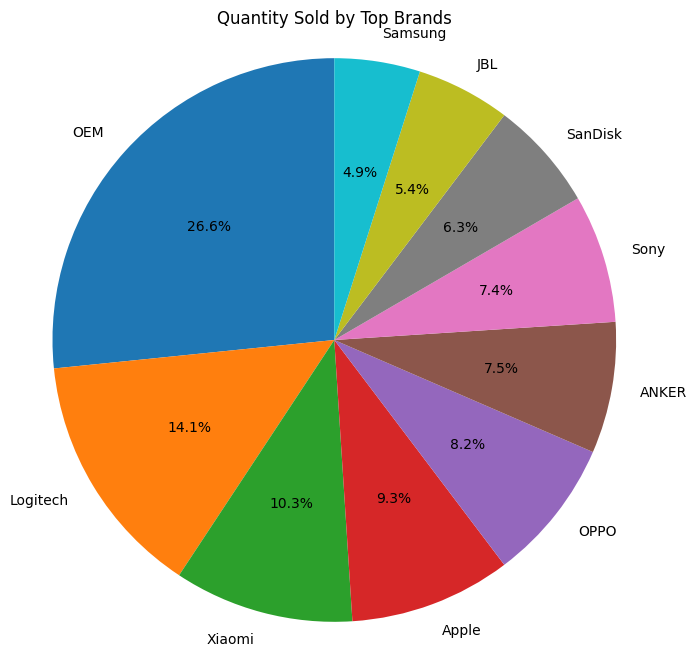

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(top_brand['quantity_sold'], labels=top_brand['brand_name'], autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Quantity Sold by Top Brands')
plt.show()

In [ ]:
df.sort_values(by='rating_average', ascending=False).head(20)

id                                               name brand_name  \
0     216174917  Điện thoại Samsung Galaxy S23 Ultra 5G (8GB/25...    Samsung   
1251  208379860  Ổ cứng SSD Samsung 980 Pro Heatsink PCIe NVMe ...    Samsung   
2595  165208911  Sạc dành cho laptop Dell Inspiron 3537 có đèn ...     MSmart   
1261   94161538  Màn hình máy tính LG 27MP500-B 27 inch Full HD...         LG   
1260   58257520  Màn Hình Gaming LG 27QN600-B 27 inch QHD (2560...         LG   
2596  160995649  Pin cho Laptop Toshiba R940 R630 R830 R835 R84...     MSmart   
2599  165210093  Sạc dành cho laptop MSI GE62 6QD - Hàng Nhập K...     MSmart   
2601  160994977  Pin cho Laptop HP 840 g1 740 g1 850 g1 840g1 -...     MSmart   
1256  208440428  Màn hình máy tính full viền 22 inch - BH 3 năm...      TOMKO   
1255  141774303  Màn hình Xiaomi Mi Monitor BHR4975EU RMMNT27NF...     Xiaomi   
2605  193513449  Sạc cho Laptop Acer 19V 2.37a 3.42a - công suấ...     MSmart   
2607    1939921  Hộp Mực In 85A HM247 Dùng Cho Máy In HP 1102, ...     Ecoink   
2610  217317427  Box đựng ổ cứng Orico SSD M2 PCIe NVMe To Thun...      Orico   
2611  247768228  Màn Hình Cong MSI Optix G27C4X (27"/FHD/VA/250...       MSI    
2621    6092587  Cáp mạng Cat6 UTP 24AWG đầu bọc kim loại dài 0...     UGREEN   
2613  164250802  Ổ cứng SSD KingSpec M2 PCIe NVMe | NE - Hàng C...   KingSpec   
2615   11224569  Ổ cứng gắn trong SSD Crucial MX500 1TB 2.5 ...    Crucial   
1247     459843  Bộ Chuyển Đổi Không Dây TP-Link TL-WN881ND PCI...    TP-Link   
2616  200008937  Pin dùng cho Laptop HP ProBook 450 G3 - Hàng N...   MISUFUJl   
1245   55576273  Dây cáp mạng Ethernet Cat6 Vention, dạng dẹt -...    VENTION   

      original_price     price  discount  quantity_sold  rating_average  \
0           31990000  31990000         0             17             5.0   
1251         2650000   2600000         2             18             5.0   
2595          363510    302925        17              1             5.0   
1261         4190000   3660000        13             76             5.0   
1260         7890000   5970000        24            241             5.0   
2596          452970    377475        17              4             5.0   
2599          754110    628425        17              1             5.0   
2601          994140    828450        17              1             5.0   
1256         1590000   1542000         3              6             5.0   
1255         4779000   4500000         6             89             5.0   
2605          277200    231000        17              2             5.0   
2607          145000    145000         0             24             5.0   
2610         1900000   1900000         0              8             5.0   
2611         5890000   5890000         0              1             5.0   
2621           56000     40000        29             87             5.0   
2613          598000    370760        38             21             5.0   
2615         1750000   1750000         0             81             5.0   
1247          249000    249000         0             37             5.0   
2616          431400    372082        14              1             5.0   
1245           44000     38000        14            618             5.0   

      review_count                     category  
0                3      dien thoai may tinh ban  
1251             7  laptop may vi tinh linh kie  
2595             1  laptop may vi tinh linh kie  
1261            17  laptop may vi tinh linh kie  
1260           100  laptop may vi tinh linh kie  
2596             1  laptop may vi tinh linh kie  
2599             1  laptop may vi tinh linh kie  
2601             1  laptop may vi tinh linh kie  
1256             4  laptop may vi tinh linh kie  
1255            27  laptop may vi tinh linh kie  
2605             1  laptop may vi tinh linh kie  
2607             4  laptop may vi tinh linh kie  
2610             1  laptop may vi tinh linh kie  
2611             1  laptop may vi t

**Ở trên là những sản phẩm có lượt đánh gái tốt nhất, có một điều đặt biệt nhưng sản phẩm đầu bản đánh giá đến từ danh mục laptop máy vi tính linh kiện.**

In [ ]:
df[(df['quantity_sold']>0)& (df['rating_average']<3) & (df['rating_average']>0)].sort_values(by = ['quantity_sold'], ascending= False).head(10)

id                                               name brand_name  \
3066   24403186  Bộ máy tính để bàn Dell Optiplex  ( Core i5-24...       Dell   
3022   41694647  Máy Chiếu Mini LCD LED Projector PD300 Cao Cấp...        OEM   
3100   24506870  Bộ Máy Tính Để Bàn Dell Optiplex ( Corei5 - 24...       Dell   
2653  198254310  Thẻ Imou lưu trữ đám mây - Gói 1 tháng I Hàng ...       IMOU   
2561   24494305               Card PCI Express ra 2 cổng COM RS232        OEM   
2357   32128974  Dung Dịch Tản Nhiệt Nước Làm Mát Siêu Nhanh (M...        OEM   
4452   89624944                    Bao da điện thoại đeo thắt lưng        OEM   
3738   28414681  LOA CARAVEN CR-853 nghe nhạc usb,thẻ nhớ ,đài ...     Craven   
3926   12302036  Thiết Bị Định Vị GPS Tracker Mini Không Dây GF...        OEM   
3848  206501860  Pin Sạc Dự Phòng 50000mAh Cực Khủng Không Dây,...        OEM   

      original_price    price  discount  quantity_sold  rating_average  \
3066         3990000  3990000         0             43             2.3   
3022          743000   743000         0             39             2.9   
3100         3990000  3990000         0             36             2.0   
2653          170000   170000         0             30             1.0   
2561          235000   235000         0             25             2.8   
2357          141000   141000         0             24             1.0   
4452          150000   150000         0             24             2.4   
3738          151898   151898         0             22             2.6   
3926          199000   199000         0             17             2.7   
3848          569000   569000         0             13             2.8   

      review_count                     category  
3066             3  laptop may vi tinh linh kie  
3022             7  laptop may vi tinh linh kie  
3100             5  laptop may vi tinh linh kie  
2653             1  laptop may vi tinh linh kie  
2561             4  laptop may vi tinh linh kie  
2357             1  laptop may vi tinh linh kie  
4452             7      thiet bi kts phu kien s  
3738             5      thiet bi kts phu kien s  
3926             3      thiet bi kts phu kien s  
3848             6      thiet bi kts phu kien s

**Ở trên là những sản pahamr có lượt bán ổn nhưng rating lại khá thấp chứng tỏ những sản phẩm này có vấn đề. Người bán cần xem lại những sản phẩm này để khắc phục, còn về phía Tiki cần gửi thông báo nhắc nhở người bán, nếu sau nhiều lần không có sự khắc phục cần có biện pháp xử lý như xóa sản phẩm.**

In [ ]:
df.sort_values('discount', ascending=False).head(10)

id                                               name brand_name  \
3545   35228509  Ốp lưng chống sốc Gear4 D3O Piccadilly chống s...      GEAR4   
4095   35228487  Ốp lưng chống sốc Gear4 D3O Piccadilly 3m cho ...      GEAR4   
4379   47453026  Ốp lưng Gear4 D3O Piccadilly chống sốc 3m cho ...      GEAR4   
1714   25975534       Keo Tản Nhiệt Làm Mát CPU - Dạng  Xilanh Nhỏ        OEM   
3394   40875024  Ốp lưng kèm bàn phím ZAGG Keyboard Slim Book G...       ZAGG   
4098   98075461  Ốp lưng chống sốc Gear4 D3O Denali 5m cho Sams...      GEAR4   
3515  183909586  Dây quấn tai nghe, quấn dây cáp sạc điện thoại...        OEM   
4847  248539405  Tai Nghe Bluetooth Baseus WM01 TWS Không Dây -...     Baseus   
3533  197907683  Miếng Dán Cường Lực Bảo Vệ Camera Dành Cho iPh...      ANANK   
3351  247306520  Cáp sạc nhanh QGeeM USB Type C 3A dài 1.8m - H...      QGeeM   

      original_price   price  discount  quantity_sold  rating_average  \
3545          850000   90000        89            252             4.8   
4095          850000   90000        89            225             4.6   
4379          850000   90000        89             39             4.7   
1714           25000    4000        84            229             4.7   
3394         2500000  490000        80             76             4.6   
4098         1200000  299000        75             68             4.8   
3515            4000    1000        75            672             5.0   
4847          500000  146000        71             15             5.0   
3533          200000   59000        71             55             5.0   
3351          219000   64000        71             36             4.8   

      review_count                     category  
3545            96      thiet bi kts phu kien s  
4095           111      thiet bi kts phu kien s  
4379            14      thiet bi kts phu kien s  
1714            35  laptop may vi tinh linh kie  
3394            28      thiet bi kts phu kien s  
4098            30      thiet bi kts phu kien s  
3515            22      thiet bi kts phu kien s  
4847             6      thiet bi kts phu kien s  
3533            14      thiet bi kts phu kien s  
3351             8      thiet bi kts phu kien s

**Trên đây là những sản phẩm giảm giá nhiều nhất đa số là những phụ kiện số**

In [ ]:
df[(df['quantity_sold']>0)& (df['discount']>0)& (df['rating_average']<3)&(df['rating_average']>0)].sort_values(by = 'discount', ascending= False).sort_values(by= 'quantity_sold', ascending=False).head(10)

id                                               name brand_name  \
567    70839193  ĐIỆN THOẠI TÂN CỔ ĐIỂN DT4  bàn phím quay , dù...        OEM   
2172  249022225  Màn hình máy tính Dell E1916HV ( 19" 1366 x 76...       Dell   
4331  217214045  Giá Đỡ Laptop Nhôm , Laptop Stand Gấp Gọn Dùng...      KINGO   
2555  137170896  Bàn phím thay thế dành cho laptop Dell Vostro ...      HI PC   
2011  160995955  Pin cho Laptop TOSHIBA 3820 N300 NB505 - Hàng ...     MSmart   
2600  165209432  Sạc dành cho laptop Dell Latitude E7470 có đèn...     MSmart   
2549  117094392  Pin Dành Cho Laptop Dell Inspiron 1318 Studio ...      HI PC   
2557  117092971  Pin cho Laptop Dell Latitude E6410 - Hàng Nhập...      HI PC   

      original_price    price  discount  quantity_sold  rating_average  \
567          2100000  1575000        25              8             1.0   
2172         1190000  1178100         1              5             2.0   
4331          195000   165000        15              4             1.0   
2555          249000   199000        20              1             2.0   
2011          452970   377475        17              1             1.0   
2600          363510   302925        17              1             2.0   
2549          375000   325000        13              1             1.0   
2557          374000   324000        13              1             1.0   

      review_count                     category  
567              1      dien thoai may tinh ban  
2172             1  laptop may vi tinh linh kie  
4331             2      thiet bi kts phu kien s  
2555             1  laptop may vi tinh linh kie  
2011             1  laptop may vi tinh linh kie  
2600             1  laptop may vi tinh linh kie  
2549             1  laptop may vi tinh linh kie  
2557             1  laptop may vi tinh linh kie

**Trên đây là những sản phẩm dù có giảm giá và lượt bán nhưng rating rất tệ chứng tỏ những sản phẩm này rất tệ cần được xem xét**

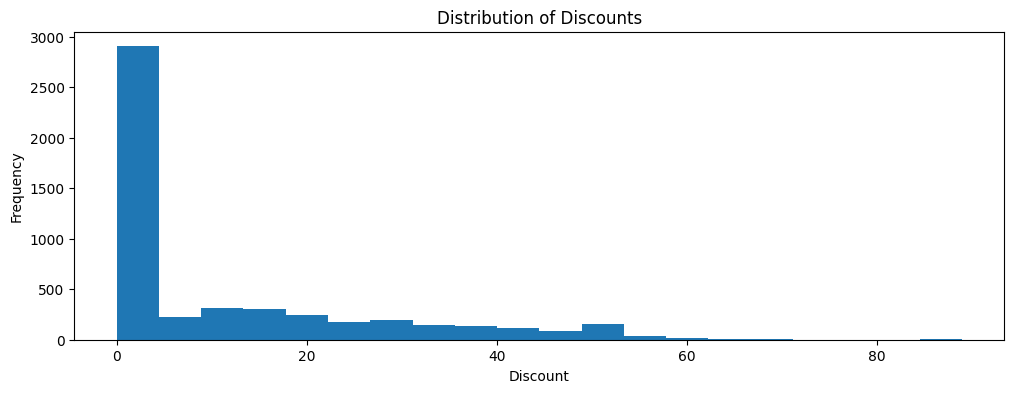

In [ ]:
fig = plt.figure(figsize=(12, 4))
plt.hist(df['discount'], bins=20)
plt.xlabel('Discount')
plt.ylabel('Frequency')
plt.title('Distribution of Discounts')
plt.show()

**Những sản phẩm trong ngành hàng thiết bị điện tử này thường được giảm giá rất ít vì những sản phẩm như laptop hay điện thoại là những sản phẩm có giá trị cao nên ít được giảm giá còn về những phụ kiện thì như ốp lưng, tai nghe sẽ có giá khá rẻ nên thường cũng sẽ không được giảm giá. Ở ngành hàng này thì mức discount dưới 20% là chủ yếu cho những sản phẩm tầm trung**

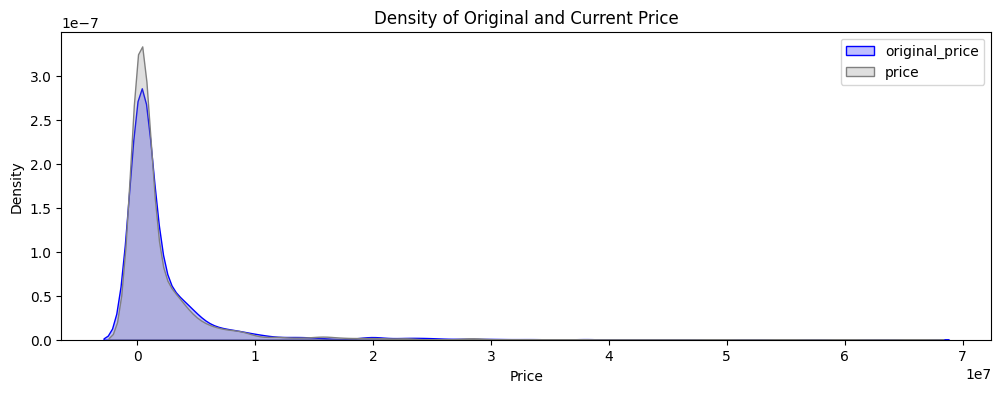

In [ ]:
import seaborn as sns
fig = plt.subplots(figsize=(12, 4))

ax = sns.kdeplot(df.original_price, color='blue', shade=True, label='original_price')
ax = sns.kdeplot(df.price, color='gray', shade=True, label='price')

plt.xlabel('Price')
plt.title('Density of Original and Current Price')
plt.legend()
plt.show()

**Ta có thể dễ dàng thấy được các vùng chồng lấp giữa hai đường cong mật độ hienr thị các phạm vi giá mà cả gí gốc và giá hiện tại đều có mật độ tương tự nhau. Điều này cho thấy có sự trùng lặp đáng kiểu giữa 2 phân bổ giá. Ngoài ra đỉnh của đường mật độ giá hiện tịa cao hơn đỉnh cảu đường mật độ giá bán đầu điều này cho thấy rằng sự gia tăng tổng thể về giá cả**

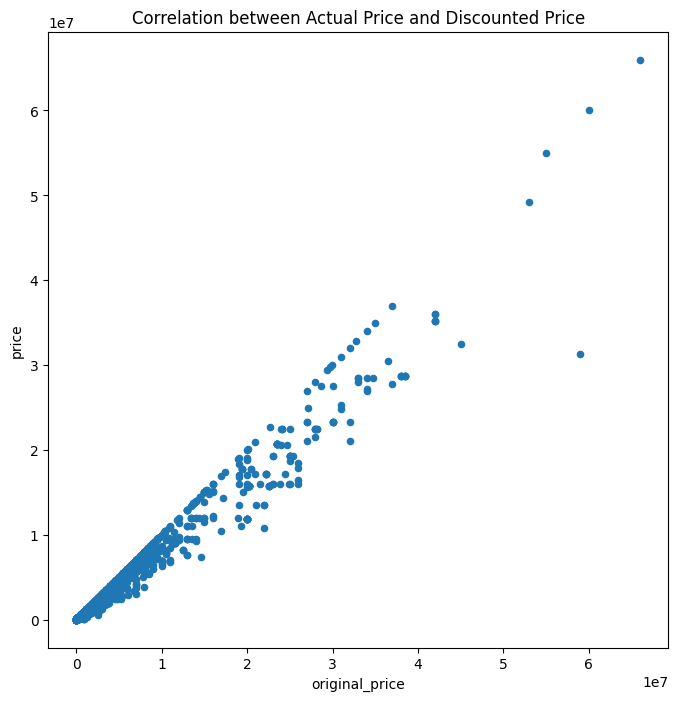

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
df.plot(kind='scatter', x='original_price', y='price', ax=ax)
ax.set_title('Correlation between Actual Price and Discounted Price')
plt.show()

**Hình trên là mối tương quan về giá gốc và giá hiện tại, ta có thể thấy các điểm dữ liệu trên biểu đồ có xu hướng tăng dần điều này cho thấy giá gốc càng tăng thì xu hướng giá sản phẩm hiện tại cx tăng trong ngành hàng thiết bị điện tử này**

Text(0.5, 0, 'Rating')

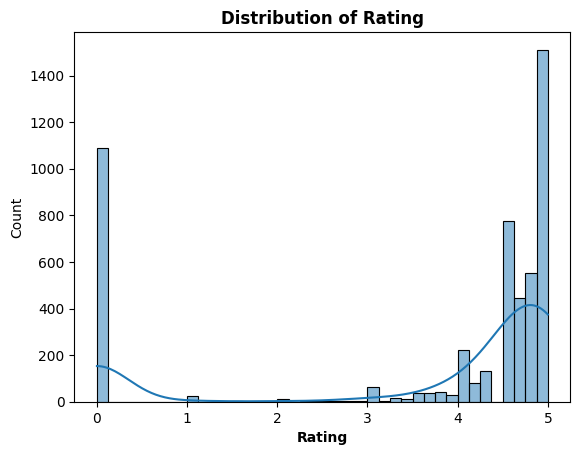

In [ ]:
sns.histplot(df["rating_average"], kde=True,bins = int(200/5))
plt.title("Distribution of Rating", fontweight='bold')
plt.xlabel("Rating", fontweight='bold')

**Ta có thể thấy được sản phẩm trong ngành hàng này thường được đánh giá khá tốt, tuy nhiên cột O sao vẫn khá cao điều này có thể do sản phẩm chưa được đánh giá hoặc không được đánh giá khi đã mua cần thêm một số yếu tố khách để có thể nhận xét 0 sao nhiều là sản phẩm không tốt**

In [ ]:
rating_score = []
for score in df['rating_average']:
    if score < 2.0:
        rating_score.append('Poor')
    elif score < 3.0:
        rating_score.append('Below Average')
    elif score < 4.0:
        rating_score.append('Average')
    elif score < 5.0:
        rating_score.append('Above Average')
    elif score == 5.0:
        rating_score.append('Excellent')

In [ ]:
df['rating_score'] = rating_score

df['rating_score'] = df['rating_score'].astype('category')

In [ ]:
rating_score = df['rating_score'].value_counts().reindex(index = ['Poor','Below Average', 'Average', 'Above Average', 'Excellent']). \
rename_axis('rating_score').reset_index(name='counts')

rating_score

rating_score  counts
0           Poor    1114
1  Below Average      27
2        Average     240
3  Above Average    2205
4      Excellent    1511

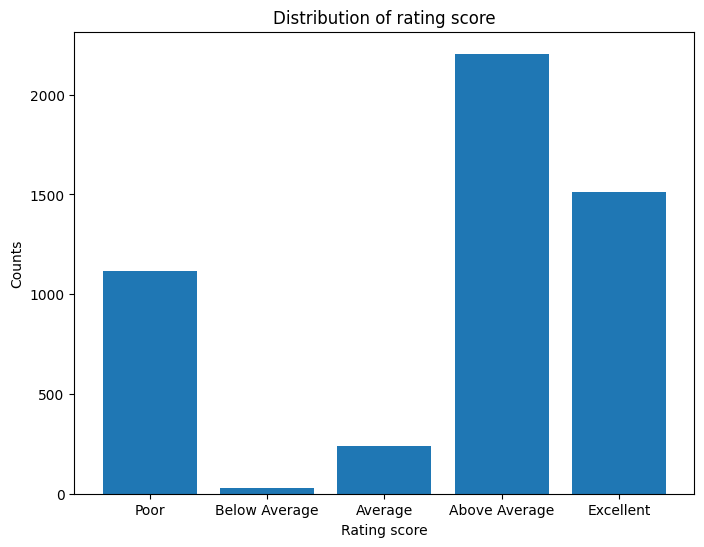

In [ ]:
# Distribution of rating score


ax = plt.subplots(figsize=(8, 6))[1]
ax.bar(x=rating_score['rating_score'], height=rating_score['counts'])
ax.set_title('Distribution of rating score')
ax.set_xlabel('Rating score')
ax.set_ylabel('Counts')

plt.show()

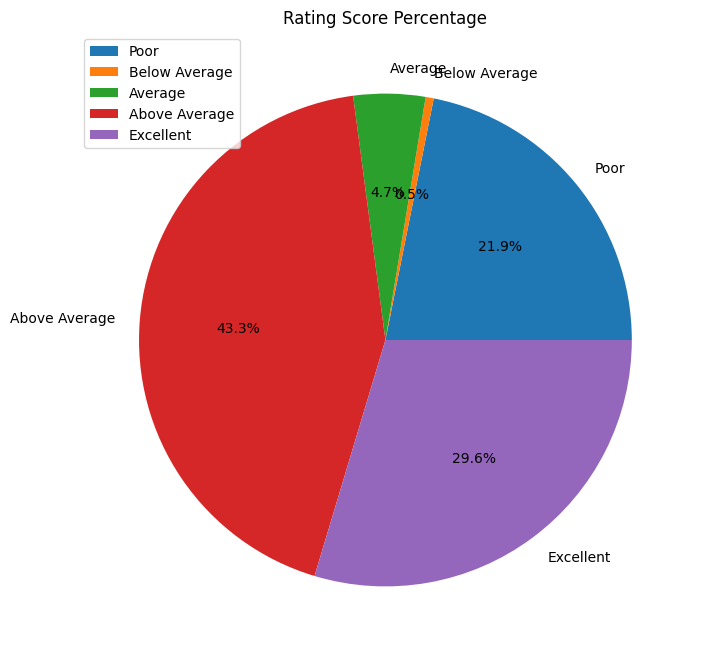

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
labels = rating_score['rating_score']
sizes = rating_score['counts']
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
ax.set_title('Rating Score Percentage')

# Add legend
ax.legend(labels=labels, loc='best')

plt.show()

**Ở trên tôi có chia dữ liệu về rating thành các mức để ta có thể nhìn trực quan nó hơn đa số sản phẩm ở ngành hàng này đều trên mức đánh giá trung bình.**

## Each Category

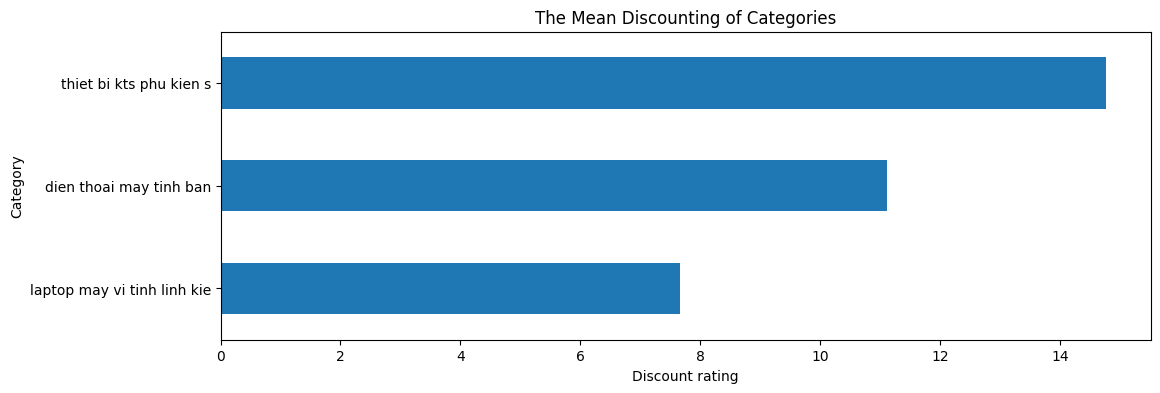

In [ ]:
fig, ax = plt.subplots(figsize=(12,4))

ax=df.groupby('category').discount.mean().sort_values(ascending=True).plot(kind='barh')

plt.xlabel('Discount rating')
plt.ylabel('Category')
plt.title('The Mean Discounting of Categories')
plt.show()

**Biểu đồ trên cho thấy laptop máy tính rất ít giảm giá vì lý do đã nói ở trên. Theo đó thì việc điện thoại máy tính bảng xếp sau thiết bị kts phụ kiện số là việc dễ hiểu**

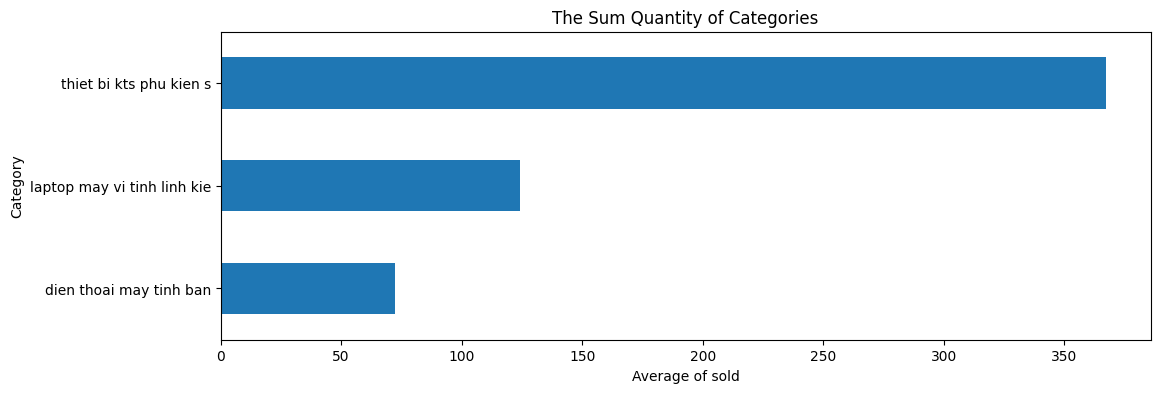

In [ ]:
fig, ax = plt.subplots(figsize=(12,4))

ax=df.groupby('category').quantity_sold.mean().sort_values(ascending=True).plot(kind='barh')

plt.xlabel('Average of sold')
plt.ylabel('Category')
plt.title('The Sum Quantity of Categories')
plt.show()

**Danh mục thiết bị kỹ thuật số phụ kiện số có trung bình lượt bán cao hơn hẳn 2 danh mục khác vì một phần là do giá rẻ và được giảm giá nhiều**

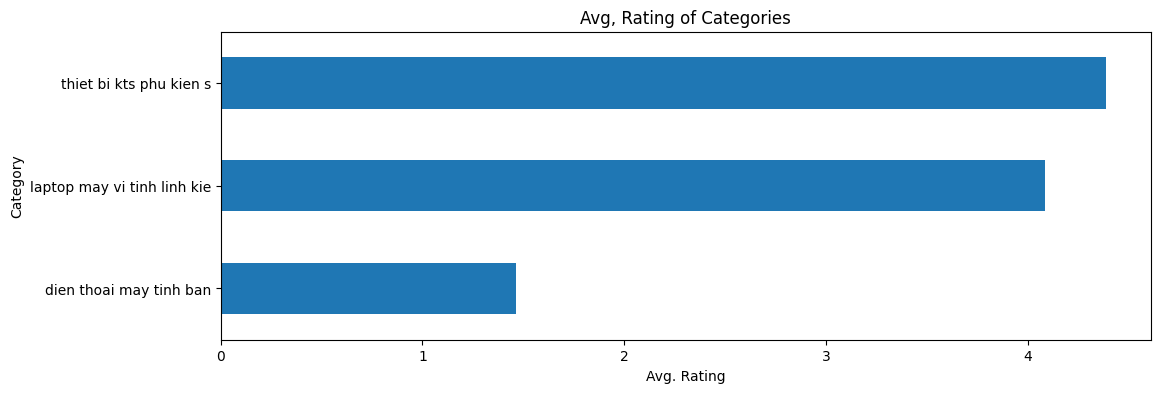

In [ ]:
fig, ax = plt.subplots(figsize=(12,4))

ax=df.groupby('category').rating_average.mean().sort_values(ascending=True).plot(kind='barh')

plt.xlabel('Avg. Rating')
plt.ylabel('Category')
plt.title('Avg, Rating of Categories')
plt.show()

**Rating của danh mục laptop máy vi tính linh kiện lại khá tốt gần chỉ xếp sau thiết bị kỹ thuật số phụ kiện số một chút chứng tỏ những sản phẩm ở danh mục này có chất lượng khá tốt vì chỉ có lượt bán ít hơn nhưng được đánh giá khá tốt**

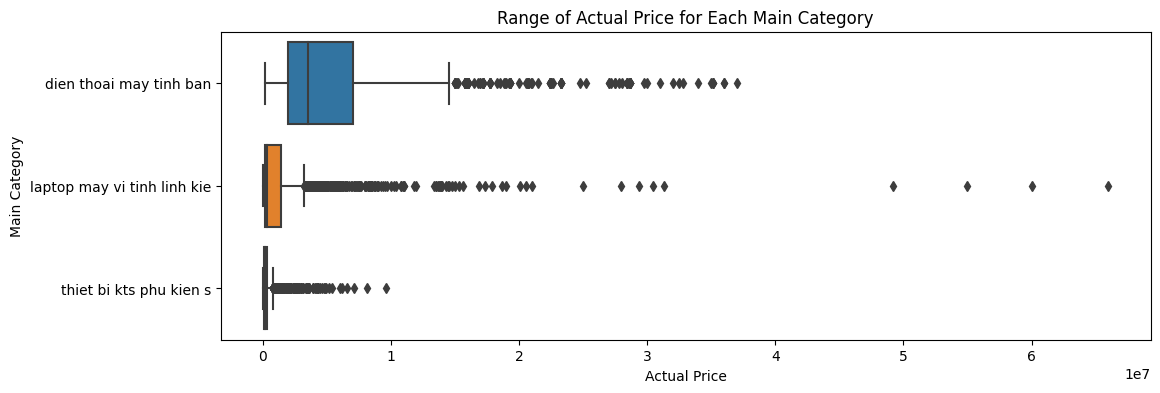

In [ ]:
plt.figure(figsize=(12, 4))
sns.boxplot(x='price', y='category', data=df)
plt.title("Range of Actual Price for Each Main Category")
plt.xlabel("Actual Price")
plt.ylabel("Main Category")
plt.show()

**Biểu đồ trên ta có thể thấy được phạm vi giá của từng danh mục đúng với những phân tích trước về thiết bị kỹ thuật số phụ kiện số có giá khá thấp. Điều cần nói ở đây là khi tôi nói giá của laptop top khá cao nhưng khoản giá lại tập trung tại những điểm khá thấp vì danh mục ở đây là laptop máy vi tính linh kiện ta có thể thấy được ở những khoản giá thấp có thể là những linh kiện và ngoài đó chung ta có thễ thấy được các điểm dữ liệu vẫn trãi rất dài và có những điểm ở rất xa chứng tỏ giá vẫn rất cao**

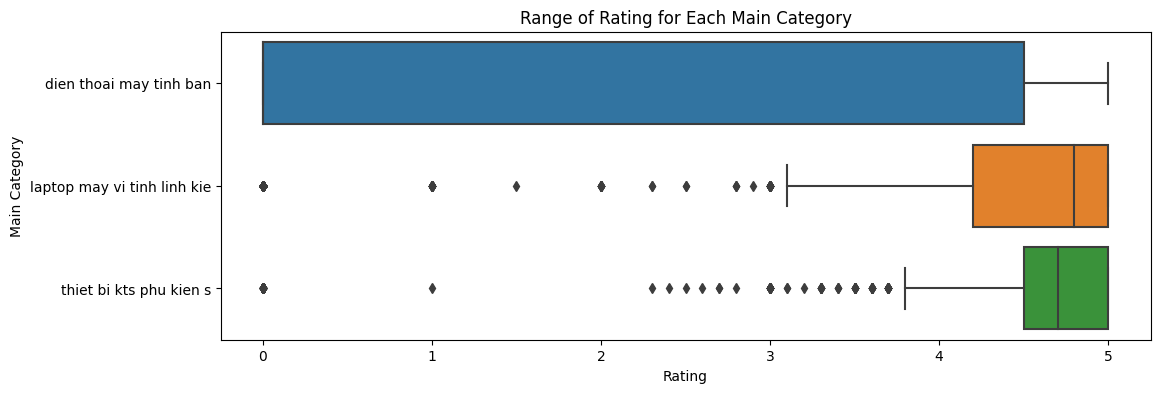

In [ ]:
plt.figure(figsize=(12, 4))
sns.boxplot(x='rating_average', y='category', data=df)
plt.title("Range of Rating for Each Main Category")
plt.xlabel("Rating")
plt.ylabel("Main Category")
plt.show()

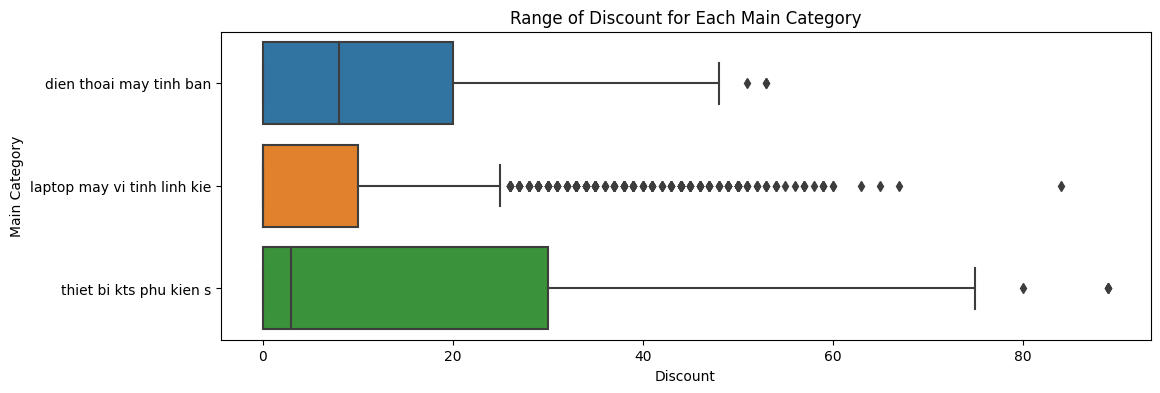

In [ ]:
plt.figure(figsize=(12, 4))
sns.boxplot(x='discount', y='category', data=df)
plt.title("Range of Discount for Each Main Category")
plt.xlabel("Discount")
plt.ylabel("Main Category")
plt.show()

In [ ]:
grouped_df = df.groupby('category')
average_price_by_category = grouped_df['price'].mean()

print(average_price_by_category)

category
dien thoai may tinh ban        5.909544e+06
laptop may vi tinh linh kie    1.492270e+06
thiet bi kts phu kien s        3.701240e+05
Name: price, dtype: float64


In [ ]:
top_selling_products = pd.DataFrame()

for category, group in grouped_df:
    top_products = group.sort_values(by='quantity_sold', ascending=False).head(5)
    top_selling_products = top_selling_products.append(top_products)


In [ ]:
top_selling_products

id                                               name brand_name  \
27    142545270  Điện Thoại Oppo A16k (3GB/32GB) Xanh thời thượ...       OPPO   
26    189658085                     Điện Thoại Oppo A57 (4GB/64GB)       OPPO   
28     91612670                    Điện Thoại Oppo A54 (4GB/128GB)       OPPO   
5     184059211                                    Apple iPhone 13      Apple   
30     57809866              Điện thoại Xiaomi Redmi 9A (2GB/32GB)     Xiaomi   
1117  134561311  USB 3.0 SanDisk Ultra Flair CZ73 - Hàng Nhập Khẩu    SanDisk   
1162     356387  Ổ Cứng Di Động WD Elements 1TB 2.5 USB 3.0 - W...         WD   
1121     419310  Máy In Laser Đơn Năng Canon LBP 2900 - Hàng ch...      Canon   
1103   74975883  Bộ Phát Wifi TP-Link Archer C54 Băng Tần Kép C...    TP-Link   
1625   53080935  Phần mềm Microsoft 365 Personal English APAC E...  Microsoft   
3119    1600005                  Tai Nghe Nhét Tai Mi Basic Xiaomi     Xiaomi   
3511    4897521                       Tai Nghe Nhét Tai JBL C150SI        JBL   
3259     855018        Tai Nghe Nhét Tai Sony ExtraBass MDR-XB55AP       Sony   
3327     299431                      Chuột Không Dây Logitech M221   Logitech   
3124   54017350  Adapter Sạc 1 Cổng Anker PowerPort III Nano Tí...      ANKER   

      original_price     price  discount  quantity_sold  rating_average  \
27           3190000   2600000         0          23270             5.0   
26           4490000   3860000        14          11009             5.0   
28           5990000   3670000         0           6697             4.8   
5           25990000  16450000        37           5305             5.0   
30           2490000   1830000        27           5121             4.7   
1117          110000    110000         0           9991             4.8   
1162         1835900   1440000        22           9142             4.6   
1121         5830000   3860000        34           4683             4.6   
1103          858000    409000        52           4329             4.8   
1625         1290000   1060000        18           3817             5.0   
3119          149000    120000        19          40614             4.7   
3511          250000    250000         0          26732             4.7   
3259          790000    650000        18          12616             4.7   
3327          272800    169000        38          12525             4.7   
3124          400000    288000        28          12266             5.0   

      review_count                     category   rating_score  
27             275      dien thoai may tinh ban      Excellent  
26             144      dien thoai may tinh ban      Excellent  
28              72      dien thoai may tinh ban  Above Average  
5             1739      dien thoai may tinh ban      Excellent  
30             640      dien thoai may tinh ban  Above Average  
1117           208  laptop may vi tinh linh kie  Above Average  
1162           892  laptop may vi tinh linh kie  Above Average  
1121           574  laptop may vi tinh linh kie  Above Average  
1103          1271  laptop may vi tinh linh kie  Above Average  
1625           996  laptop may vi tinh linh kie      Excellent  
3119          4197      thiet bi kts phu kien s  Above Average  
3511          5258      thiet bi kts phu kien s  Above Average  
3259          2500      thiet bi kts phu kien s  Above Average  
3327          1575      thiet bi kts phu kien s  Above Average  
3124          3784      thiet bi kts phu kien s      Excellent

**Đây là top sản phẩm bán chạy nhất trong từng danh mục**

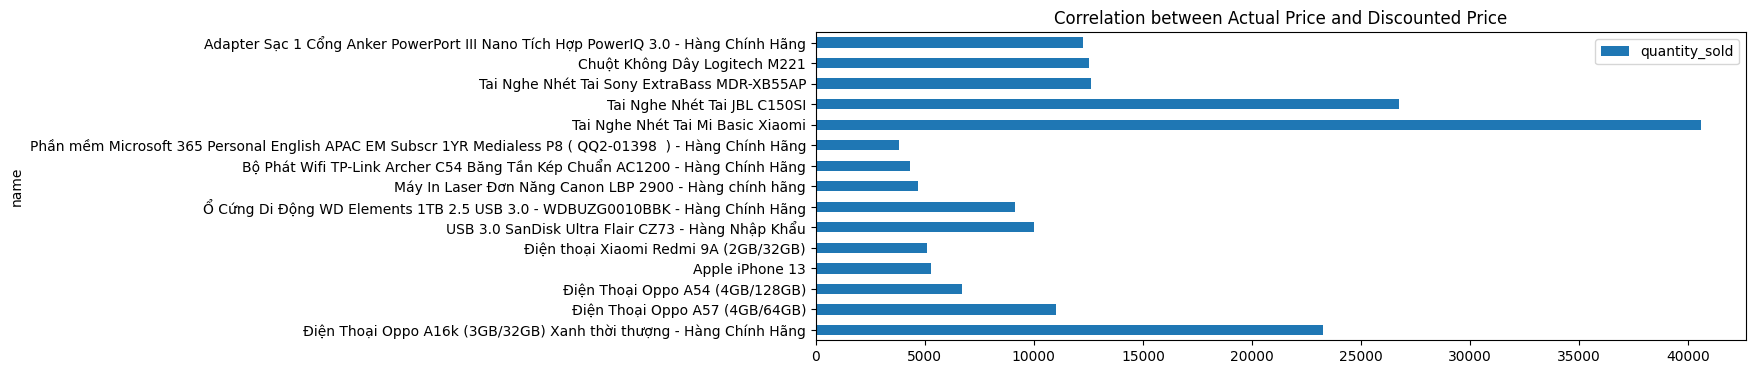

In [ ]:
fig, ax = plt.subplots(figsize=(12, 4))
top_selling_products.plot(kind='barh', x='name', y='quantity_sold', ax=ax)
ax.set_title('Correlation between Actual Price and Discounted Price')
plt.show()

In [ ]:
df_cat1 = df[df['category']== 'dien thoai may tinh ban']
df_cat2 = df[df['category']== 'laptop may vi tinh linh kie']
df_cat3 = df[df['category']=='thiet bi kts phu kien s']

In [ ]:
df_cat1

id                                               name brand_name  \
0     216174917  Điện thoại Samsung Galaxy S23 Ultra 5G (8GB/25...    Samsung   
1     212040697  Điện Thoại Samsung Galaxy A04 (3GB/32GB) - Hàn...    Samsung   
2     198671718  Điện Thoại Samsung Galaxy A04s (4GB/64GB) - Hà...    Samsung   
3     250109584  Điện thoại Xiaomi Redmi Note 12 (4GB/128GB) - ...     Xiaomi   
4     221274391  Điện thoại Tecno SPARK GO 2023 4GB/64GB - Heli...      Tecno   
...         ...                                                ...        ...   
1096  263071900  Điện thoại Tecno SPARK 10 Pro 8GB/128GB - Came...      Tecno   
1097  249730342  Điện Thoại Masstel Fami 12 4G LTE - 2 Sim- Pin...    Masstel   
1098  263047875  Điện Thoại Realme C30s 2GB/32GB - Hàng Chính Hãng     Realme   
1099  263117493  Điện thoại di động Masstel Izi 30 (new) - Hàng...    Masstel   
1100  263448701  Điện Thoại Xiaomi Redmi Note 12 (4GB/128GB) - ...     Xiaomi   

      original_price     price  discount  quantity_sold  rating_average  \
0           31990000  31990000         0             17             5.0   
1            2990000   1950000        35              9             3.0   
2            3990000   2810000        30             45             5.0   
3            4990000   3950000        21             66             5.0   
4            2490000   2290000         8             27             4.7   
...              ...       ...       ...            ...             ...   
1096         3990000   3540000        11              0             0.0   
1097          630000    630000         0              0             0.0   
1098         2490000   1939000        22              0             0.0   
1099          599000    599000         0              0             0.0   
1100         4990000   4990000         0              0             0.0   

      review_count                 category   rating_score  
0                3  dien thoai may tinh ban      Excellent  
1                1  dien thoai may tinh ban        Average  
2               12  dien thoai may tinh ban      Excellent  
3               19  dien thoai may tinh ban      Excellent  
4                6  dien thoai may tinh ban  Above Average  
...            ...                      ...            ...  
1096             0  dien thoai may tinh ban           Poor  
1097             0  dien thoai may tinh ban           Poor  
1098             0  dien thoai may tinh ban           Poor  
1099             0  dien thoai may tinh ban           Poor  
1100             0  dien thoai may tinh ban           Poor  

[1101 rows x 11 columns]

In [ ]:
df_cat2

id                                               name  \
1101  191918608  Ổ cứng SSD Acer SA100 SATA 3 3D NAND 120GB - 1...   
1102  204765801  Máy Chiếu Mini BEECUBE X2 MAX GEN 3 2023 - Hàn...   
1103   74975883  Bộ Phát Wifi TP-Link Archer C54 Băng Tần Kép C...   
1104  217317583  Box Orico Đựng Ổ Cứng HDD/SSD 2.5 inch 2520C3 ...   
1105  216462048  Box đựng ổ cứng Orico SSD M2 PCIe NVMe To USB ...   
...         ...                                                ...   
3096  199021850  Ram Laptop 4Gb 8Gb DDR4 bus 2400, ram dùng cho...   
3097  229982565  Máy tính mini PC để bàn Lenovo Thinkcentre M70...   
3098  214846804  Soundcard Thu Âm LiveStream IK Multimedia iRig...   
3099   15081289                Máy chiếu mini LCD LED YG-300 AZONE   
3100   24506870  Bộ Máy Tính Để Bàn Dell Optiplex ( Corei5 - 24...   

         brand_name  original_price    price  discount  quantity_sold  \
1101           Acer         2190000  2190000         0             76   
1102        BEECUBE         5000000  3900000        22            159   
1103        TP-Link          858000   409000        52           4329   
1104          Orico          100000    97000         3            257   
1105          Orico          350000   350000         0            142   
...             ...             ...      ...       ...            ...   
3096            OEM          209000   209000         0              9   
3097         Lenovo         3350000  3250000         3              1   
3098  IK Multimedia         1499000  1499000         0              8   
3099            OEM          849000   849000         0             12   
3100           Dell         3990000  3990000         0             36   

      rating_average  review_count                     category   rating_score  
1101             5.0            18  laptop may vi tinh linh kie      Excellent  
1102             4.7            51  laptop may vi tinh linh kie  Above Average  
1103             4.8          1271  laptop may vi tinh linh kie  Above Average  
1104             5.0            40  laptop may vi tinh linh kie      Excellent  
1105             4.6            23  laptop may vi tinh linh kie  Above Average  
...              ...           ...                          ...            ...  
3096             5.0             1  laptop may vi tinh linh kie      Excellent  
3097             0.0             0  laptop may vi tinh linh kie           Poor  
3098             3.3             4  laptop may vi tinh linh kie        Average  
3099             3.5             4  laptop may vi tinh linh kie        Average  
3100             2.0             5  laptop may vi tinh linh kie  Below Average  

[1998 rows x 11 columns]

In [ ]:
df_cat3

id                                               name brand_name  \
3101  102600970  Củ sạc nhanh chuẩn kép PD và QC3.0 Remax RP-U8...      Remax   
3102  198592687  Gimbal Điện Thoại Giá Đỡ CYKE P01 quay video 3...      CYKE    
3103   29655357  Giá đỡ, Kẹp Ipad đầu giường - Điện thoại máy t...        OEM   
3104   58736477  Giá Đỡ Kẹp Điện Thoại, Máy Tính Bảng Có Chân K...     Helios   
3105   47470738  Giá đỡ điện thoại kẹp điện thoại cao cấp 126  ...       PKCB   
...         ...                                                ...        ...   
5096  127986319  K2 LCD display cleaner - dung dịch lau rửa sạc...         K2   
5097    8275109  Đế kẹp điện thoại 2 chiều gắn chân máy Tripod 1/4        OEM   
5098   59482840  Bộ Hub QGeeM đa năng 5 trong 1 dành cho MacBoo...      QGeeM   
5099   35723054  Giá Đỡ ,kẹp điện thoại /ipad (có thể kẹp mic l...        OEM   
5100   91189740  Dây dán tiên lợi Velcro làm gọn dây sạc, dây t...     UGREEN   

      original_price   price  discount  quantity_sold  rating_average  \
3101          300000  229000        24           2772             4.8   
3102          689000  292000        58             20             3.8   
3103           72000   72000         0             36             4.5   
3104          169000  136000        20           1966             4.6   
3105          159000   95500        40           2254             4.3   
...              ...     ...       ...            ...             ...   
5096          149000  149000         0            195             5.0   
5097           10859   10859         0            172             4.5   
5098          399000  280000        30             13             5.0   
5099           89000   74000        17             16             3.0   
5100           21000   15000        29            318             4.8   

      review_count                 category   rating_score  
3101           695  thiet bi kts phu kien s  Above Average  
3102             4  thiet bi kts phu kien s        Average  
3103            15  thiet bi kts phu kien s  Above Average  
3104           585  thiet bi kts phu kien s  Above Average  
3105           423  thiet bi kts phu kien s  Above Average  
...            ...                      ...            ...  
5096            28  thiet bi kts phu kien s      Excellent  
5097            33  thiet bi kts phu kien s  Above Average  
5098             2  thiet bi kts phu kien s      Excellent  
5099             3  thiet bi kts phu kien s        Average  
5100            71  thiet bi kts phu kien s  Above Average  

[1998 rows x 11 columns]

### Điện Thoại máy tính bảng

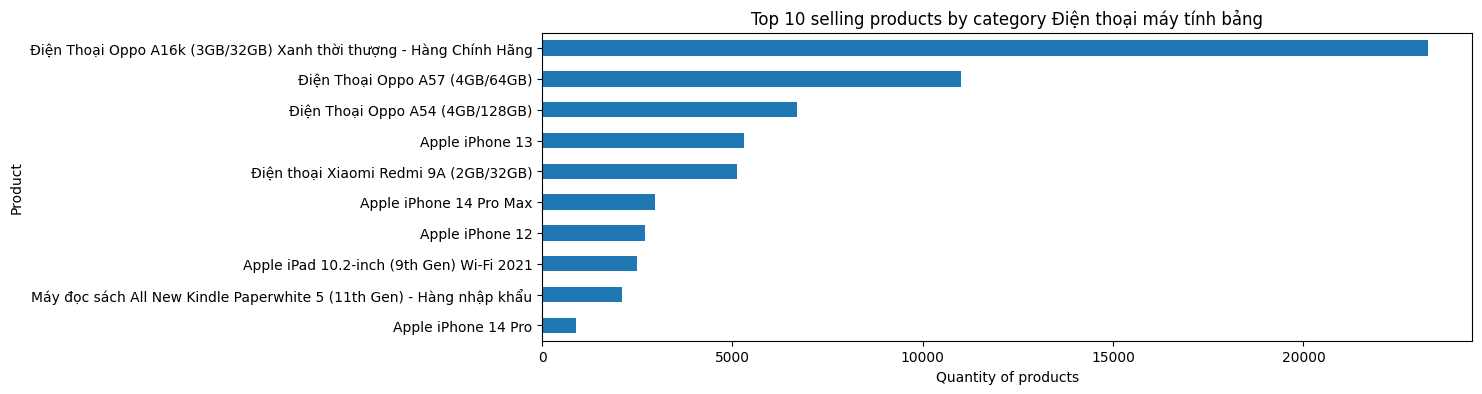

In [ ]:
fig, ax = plt.subplots(figsize=(12,4))

ax=df_cat1.groupby('name').quantity_sold.sum().sort_values(ascending=False).head(10).iloc[::-1].plot(kind='barh')

plt.xlabel('Quantity of products')
plt.ylabel('Product')
plt.title('Top 10 selling products by category Điện thoại máy tính bảng')
plt.show()

**Những sản phẩm bán chạy nhất trong danh mục điện thoại máy tính bảng**

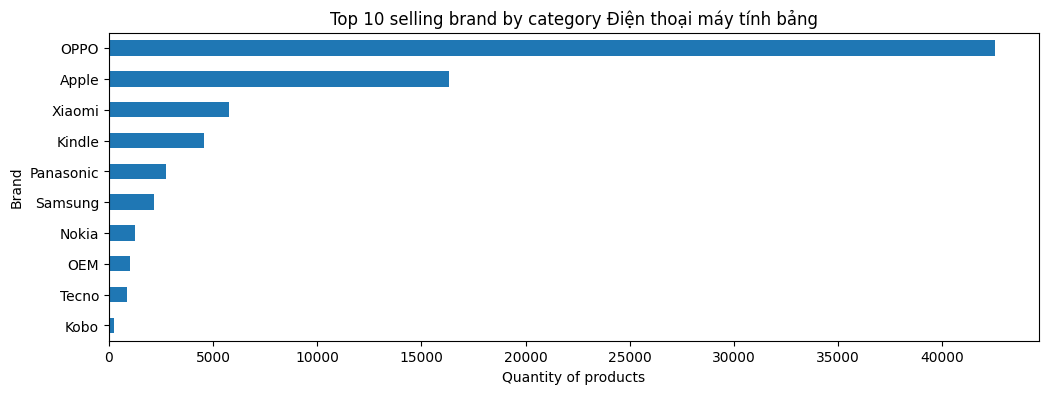

In [ ]:
fig, ax = plt.subplots(figsize=(12,4))

ax=df_cat1.groupby('brand_name').quantity_sold.sum().sort_values(ascending=False).head(10).iloc[::-1].plot(kind='barh')

plt.xlabel('Quantity of products')
plt.ylabel('Brand')
plt.title('Top 10 selling brand by category Điện thoại máy tính bảng')
plt.show()

**Ở đây ta có thể thấy được Oppo có số lượng bán nhiều nhất dù số lượng của samsung khá nhiều điều đó càng làm phân tích ở trên đúng hơn. Sau Oppo là Apple tốt hơn nhiều so với những thương hiệu sau nó.**

In [ ]:
df_cat1[(df_cat1['quantity_sold']>0)& (df_cat1['rating_average']<3) & (df_cat1['rating_average']>0)].sort_values(by = ['quantity_sold'], ascending= False)

id                                               name brand_name  \
567   70839193  ĐIỆN THOẠI TÂN CỔ ĐIỂN DT4  bàn phím quay , dù...        OEM   
662  168940033  Điện thoại Samsung Galaxy S22 Ultra 5G (8GB/12...    Samsung   
793  118136229  Điện thoại Panasonic KX-TGD312CX -Hàng chính hãng  Panasonic   
294  145762126  Điện thoại Itel it9210 4G , WiFi - Hàng chính ...        OEM   

     original_price     price  discount  quantity_sold  rating_average  \
567         2100000   1575000        25              8             1.0   
662        29755000  29755000         0              4             2.0   
793         1749000   1749000         0              2             1.0   
294          699000    699000         0              1             1.0   

     review_count                 category   rating_score  
567             1  dien thoai may tinh ban           Poor  
662             1  dien thoai may tinh ban  Below Average  
793             1  dien thoai may tinh ban           Poor  
294             1  dien thoai may tinh ban           Poor

**Ở trên là những sản phẩm được đánh giá tệ trong danh mục điện thoại máy tính bảng**

### Laptop máy vi tính linh kiện

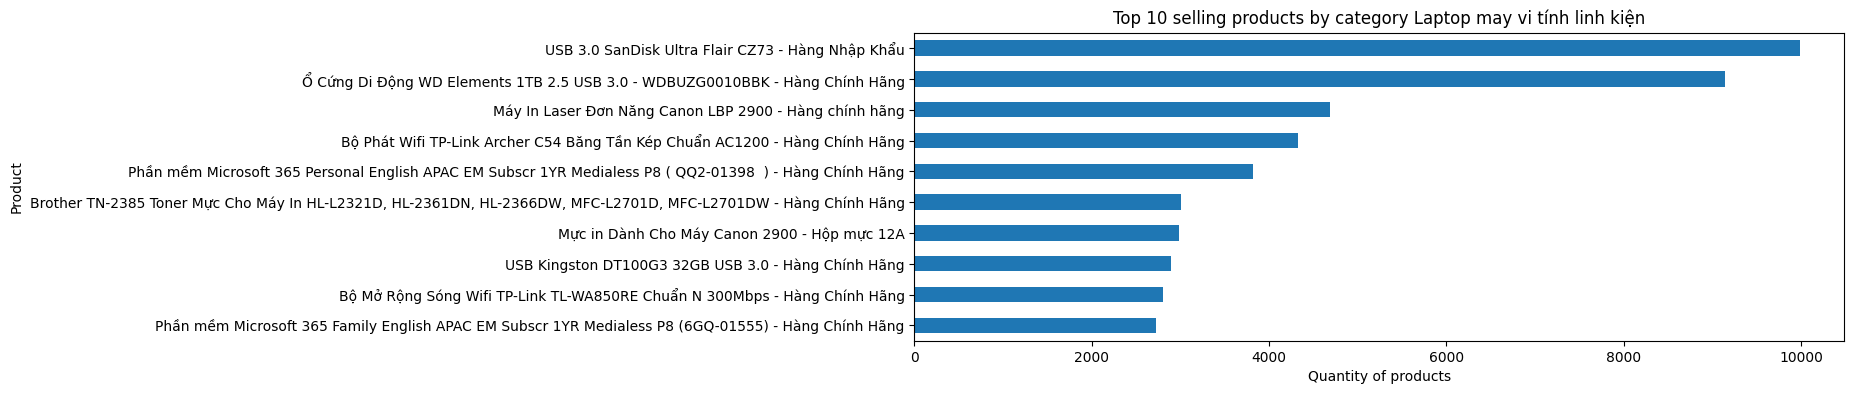

In [ ]:
fig, ax = plt.subplots(figsize=(12,4))

ax=df_cat2.groupby('name').quantity_sold.sum().sort_values(ascending=False).head(10).iloc[::-1].plot(kind='barh')

plt.xlabel('Quantity of products')
plt.ylabel('Product')
plt.title('Top 10 selling products by category Laptop may vi tính linh kiện')
plt.show()

**Ở trên là top những sản phẩm bán chạy trong danh mục laptop máy vi tính linh kiện. Ta có thể thấy được rằng đa số là những linh kiện, không có một sản phẩm nào là laptop chứng tỏ những kết luận về khoản giá có thể chính xác**

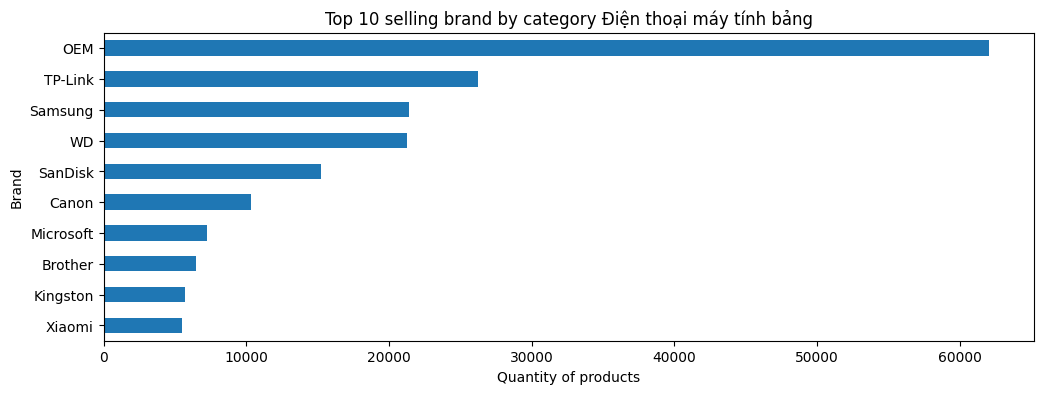

In [ ]:
fig, ax = plt.subplots(figsize=(12,4))

ax=df_cat2.groupby('brand_name').quantity_sold.sum().sort_values(ascending=False).head(10).iloc[::-1].plot(kind='barh')

plt.xlabel('Quantity of products')
plt.ylabel('Brand')
plt.title('Top 10 selling brand by category Điện thoại máy tính bảng')
plt.show()

**Top những thương hiệu bán chạy nhất trong danh mục này, vì những sản phẩm bán chạy đa số là linh kiện thì OEM chắc chắn vẫn là vị thế đầu bảng của danh mục**

In [ ]:
df_cat2[(df_cat2['quantity_sold']>0)& (df_cat2['rating_average']<3) & (df_cat2['rating_average']>0)].sort_values(by = ['quantity_sold'], ascending= False).head(10)

id                                               name brand_name  \
3066   24403186  Bộ máy tính để bàn Dell Optiplex  ( Core i5-24...       Dell   
3022   41694647  Máy Chiếu Mini LCD LED Projector PD300 Cao Cấp...        OEM   
3100   24506870  Bộ Máy Tính Để Bàn Dell Optiplex ( Corei5 - 24...       Dell   
2653  198254310  Thẻ Imou lưu trữ đám mây - Gói 1 tháng I Hàng ...       IMOU   
2561   24494305               Card PCI Express ra 2 cổng COM RS232        OEM   
2357   32128974  Dung Dịch Tản Nhiệt Nước Làm Mát Siêu Nhanh (M...        OEM   
2081  125935609           Mainboard H110 ddr4 socket 1151  mới đẹp        OEM   
2781  141365422  Vỏ Hộp Riêng Cho Dock Ổ Cứng 3.5 / 2.5 USB 3.0...        OEM   
2782  114896460  Fan case LED 12 cm Cao Cấp. Fan tản nhiệt. tra...        OEM   
3057  109567587  Máy chiếu mini Q2 LCD PROJECTOR hỗ trợ giảng d...        OEM   

      original_price    price  discount  quantity_sold  rating_average  \
3066         3990000  3990000         0             43             2.3   
3022          743000   743000         0             39             2.9   
3100         3990000  3990000         0             36             2.0   
2653          170000   170000         0             30             1.0   
2561          235000   235000         0             25             2.8   
2357          141000   141000         0             24             1.0   
2081          380000   380000         0             11             2.8   
2781           95000    95000         0             11             2.3   
2782           52000    52000         0              9             2.5   
3057         1380000  1380000         0              8             2.8   

      review_count                     category   rating_score  
3066             3  laptop may vi tinh linh kie  Below Average  
3022             7  laptop may vi tinh linh kie  Below Average  
3100             5  laptop may vi tinh linh kie  Below Average  
2653             1  laptop may vi tinh linh kie           Poor  
2561             4  laptop may vi tinh linh kie  Below Average  
2357             1  laptop may vi tinh linh kie           Poor  
2081             4  laptop may vi tinh linh kie  Below Average  
2781             3  laptop may vi tinh linh kie  Below Average  
2782             2  laptop may vi tinh linh kie  Below Average  
3057             4  laptop may vi tinh linh kie  Below Average

**Đây là những sản phẩm có đnahs giá tệ cần được xem xét để khắc phục cải thiện trải nghiệm của khách hàng**

### Thiết bị kts phụ kiện số

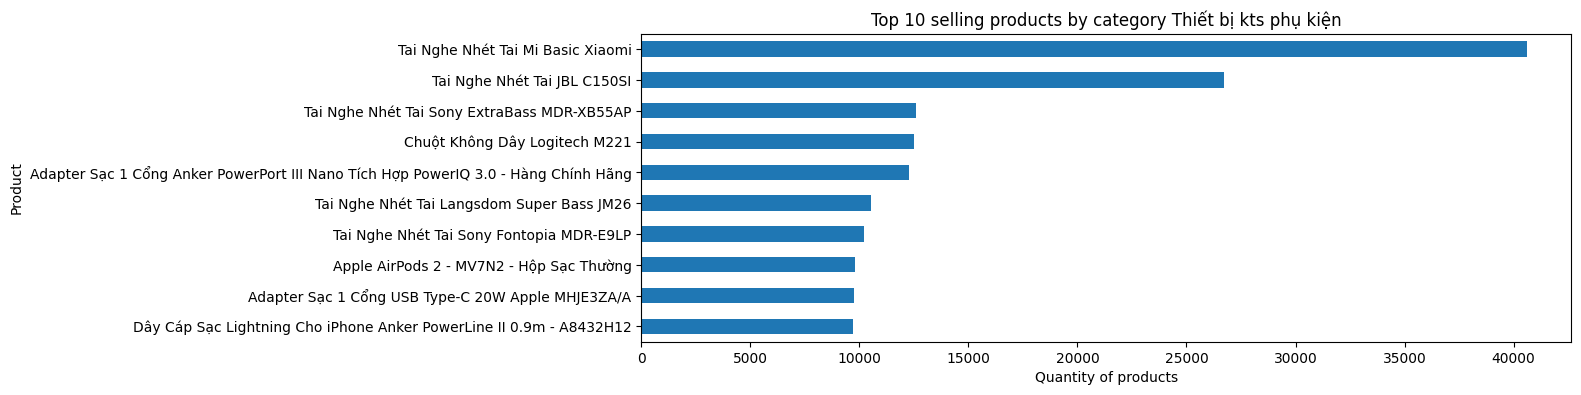

In [ ]:
fig, ax = plt.subplots(figsize=(12,4))

ax=df_cat3.groupby('name').quantity_sold.sum().sort_values(ascending=False).head(10).iloc[::-1].plot(kind='barh')

plt.xlabel('Quantity of products')
plt.ylabel('Product')
plt.title('Top 10 selling products by category Thiết bị kts phụ kiện')
plt.show()

**Top những sản phẩm bán chạy nhất trong danh mục thiết bị kỹ thuật số phụ kiện số**

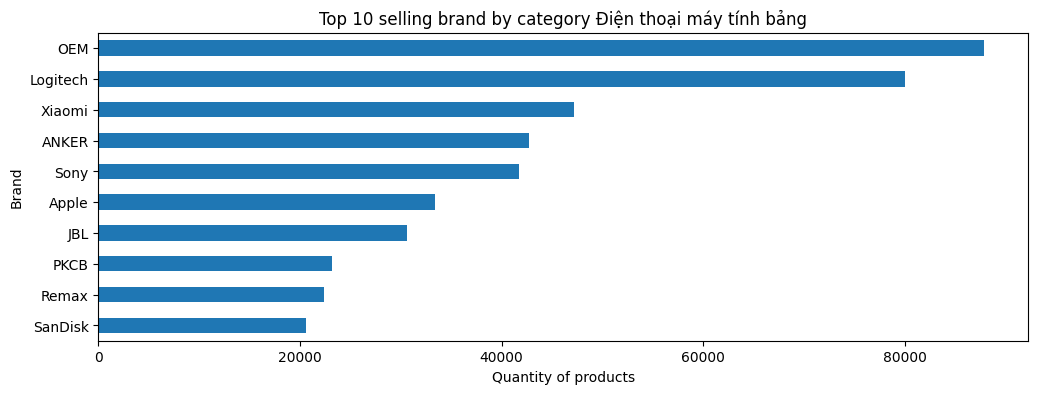

In [ ]:
fig, ax = plt.subplots(figsize=(12,4))

ax=df_cat3.groupby('brand_name').quantity_sold.sum().sort_values(ascending=False).head(10).iloc[::-1].plot(kind='barh')

plt.xlabel('Quantity of products')
plt.ylabel('Brand')
plt.title('Top 10 selling brand by category Điện thoại máy tính bảng')
plt.show()

**Top những thương hiệu bán tốt nhất trong danh mục này**

In [ ]:
df_cat3[(df_cat3['quantity_sold']>0)& (df_cat3['rating_average']<3) & (df_cat3['rating_average']>0)].sort_values(by = ['quantity_sold'], ascending= False)

id                                               name brand_name  \
4452   89624944                    Bao da điện thoại đeo thắt lưng        OEM   
3738   28414681  LOA CARAVEN CR-853 nghe nhạc usb,thẻ nhớ ,đài ...     Craven   
3926   12302036  Thiết Bị Định Vị GPS Tracker Mini Không Dây GF...        OEM   
3848  206501860  Pin Sạc Dự Phòng 50000mAh Cực Khủng Không Dây,...        OEM   
4780    8389612  Ốp lưng silicon cho iPhone 6PLUS/6S PLUS Đen (...        OEM   
3873  247762543  Pin Sạc Dự Phòng Kensonic 20.000 mAh Màu Trắng...   Kensonic   
4331  217214045  Giá Đỡ Laptop Nhôm , Laptop Stand Gấp Gọn Dùng...      KINGO   
4567  183896276  Ốp lưng chống sốc XUNDD cho oppo find x5 bảo v...      Xundd   

      original_price   price  discount  quantity_sold  rating_average  \
4452          150000  150000         0             24             2.4   
3738          151898  151898         0             22             2.6   
3926          199000  199000         0             17             2.7   
3848          569000  569000         0             13             2.8   
4780           18000   18000         0             10             2.3   
3873           83000   83000         0              9             2.7   
4331          195000  165000        15              4             1.0   
4567          180000  180000         0              3             2.5   

      review_count                 category   rating_score  
4452             7  thiet bi kts phu kien s  Below Average  
3738             5  thiet bi kts phu kien s  Below Average  
3926             3  thiet bi kts phu kien s  Below Average  
3848             6  thiet bi kts phu kien s  Below Average  
4780             4  thiet bi kts phu kien s  Below Average  
3873             3  thiet bi kts phu kien s  Below Average  
4331             2  thiet bi kts phu kien s           Poor  
4567             2  thiet bi kts phu kien s  Below Average

**Đây là những sản phẩm bị đánh giá tệ**

# Machine lerning


**Sử dụng Machine learning để dựu đoán giá hiện tại của sản phẩm dựa trên giá gốc, giảm giá, đánh giá trung bình cũng như lượt bình luận về sản phẩm**

**Ở đây, tôi chỉ sử dụng linear Regression để làm mô hình dự doán**

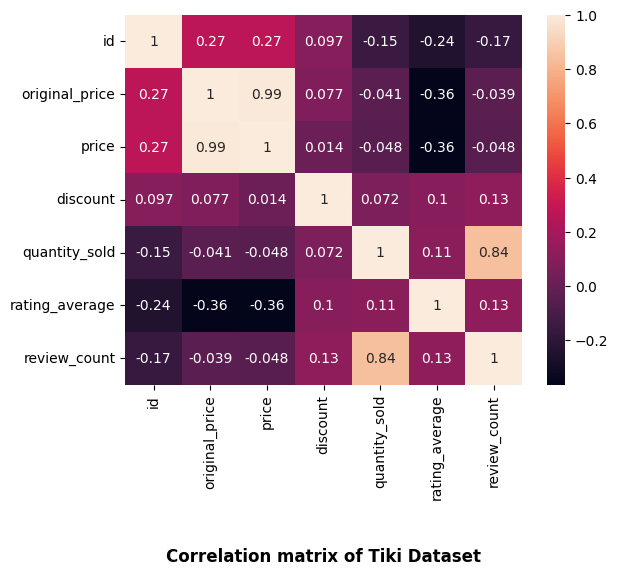

In [ ]:
corr = df.corr()
sns.heatmap(corr, annot = True)
plt.title("Correlation matrix of Tiki Dataset", y=-0.5, fontweight='bold')
plt.show()

**Biểu đồ ma trận tương quan giữa các biến của tập dữ liệu**

In [ ]:

X = df[['original_price', 'rating_average', 'discount','review_count']]
y = df['price']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 21, test_size = 0.3)

from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import r2_score
y_pred = reg.predict(X_test)
print('R2 Score: ', r2_score(y_test, y_pred))

R2 Score:  0.9787058194683873


Ở đây điểm số R2 cho ra khá cao

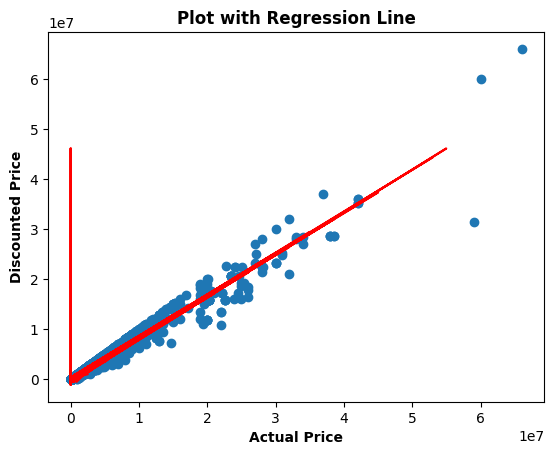

In [ ]:
plt.scatter(X_train['original_price'], y_train)
plt.plot(X_test, y_pred, color='red')
plt.xlabel('Actual Price', fontweight='bold')
plt.ylabel('Discounted Price', fontweight='bold')
plt.title('Plot with Regression Line', fontweight='bold')
plt.show()